<a href="https://colab.research.google.com/github/TruonghocAI/AIVN/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1F8NqsM04hDU8wgW1OiWM5-WZiaswxIoR

Downloading...
From (original): https://drive.google.com/uc?id=1F8NqsM04hDU8wgW1OiWM5-WZiaswxIoR
From (redirected): https://drive.google.com/uc?id=1F8NqsM04hDU8wgW1OiWM5-WZiaswxIoR&confirm=t&uuid=bdf70173-cc55-4925-8454-8d43a841b043
To: /content/cassavaleafdata.zip
100% 1.35G/1.35G [00:23<00:00, 58.2MB/s]


In [ ]:
! unzip /content/cassavaleafdata.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: cassavaleafdata/train/cgm/train-cgm-671.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-672.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-673.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-674.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-675.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-676.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-677.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-678.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-679.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-68.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-680.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-681.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-682.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-683.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-684.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-685.jpg  


In [ ]:
import torch
import torch.nn as nn
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data

from torchsummary import summary
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
data_paths = {
    'train': '/content/cassavaleafdata/train',
    'valid': '/content/cassavaleafdata/validation',
    'test': '/content/cassavaleafdata/test'
}

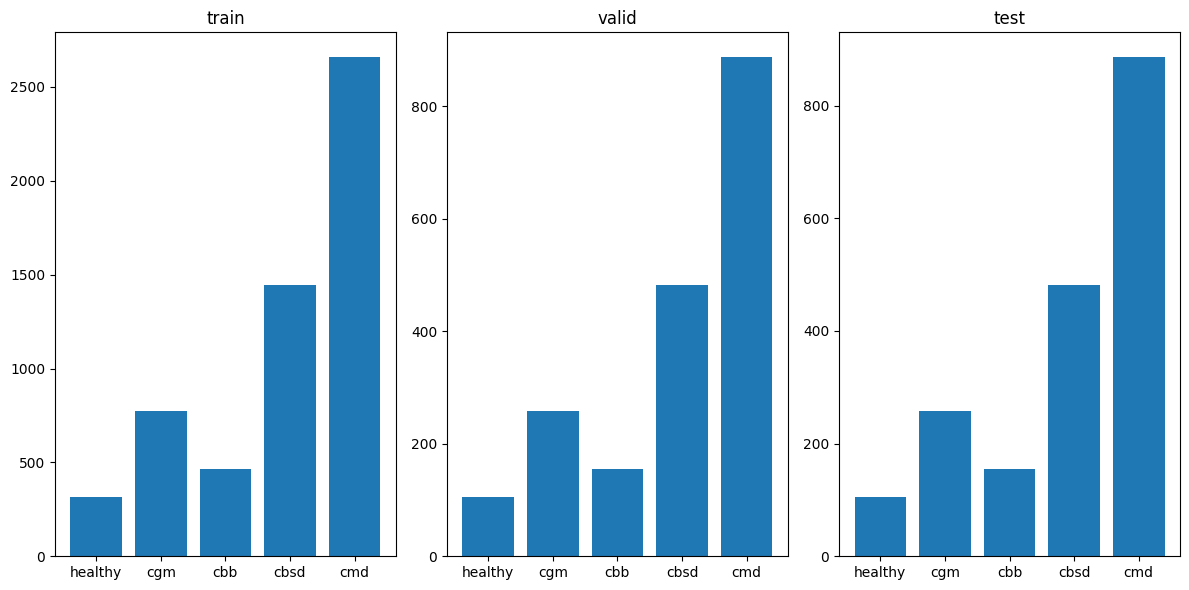

In [ ]:
from imutils import paths
def show_labels(data_paths):
    fig, ax = plt.subplots(1, len(data_paths), figsize=(12,6))
    for idx, (key, sub_dir) in enumerate(data_paths.items()):
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(key)
    plt.tight_layout()
    plt.show()

show_labels(data_paths)

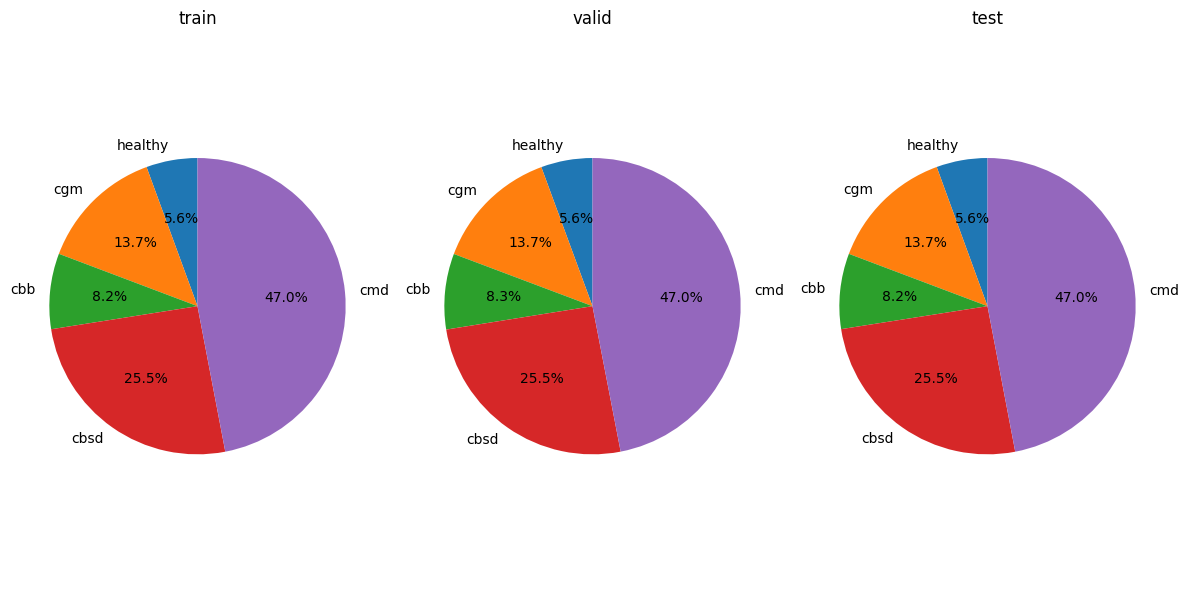

In [ ]:
from imutils import paths
def show_labels(data_paths):
    fig, ax = plt.subplots(1, len(data_paths), figsize=(12, 6))
    for idx, (key, sub_dir) in enumerate(data_paths.items()):
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].pie(list_data, labels=labels, autopct='%1.1f%%', startangle=90)
        ax[idx].axis('equal')
        ax[idx].set_title(key)
    plt.tight_layout()
    plt.show()

show_labels(data_paths)

In [ ]:
labels_dict = {
    "cbb": "Bệnh cháy lá vi khuẩn sắn (CBB)",
    "cbsd": "Bệnh sọc nâu trên sắn (CBSD)",
    "cgm": "Bệnh đốm xanh trên sắn (CGM)",
    "cmd": "Bệnh khảm lá sắn (CMD)",
    "healthy": "Cây khỏe mạnh"
}

In [ ]:
def show_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = Image.open(image_dir)
        label = image_dir.split('/')[-2]
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(labels_dict[label])
        ax[i//(num_sample//2)][i%(num_sample//2)].axis('off')
    plt.tight_layout()
    plt.show()

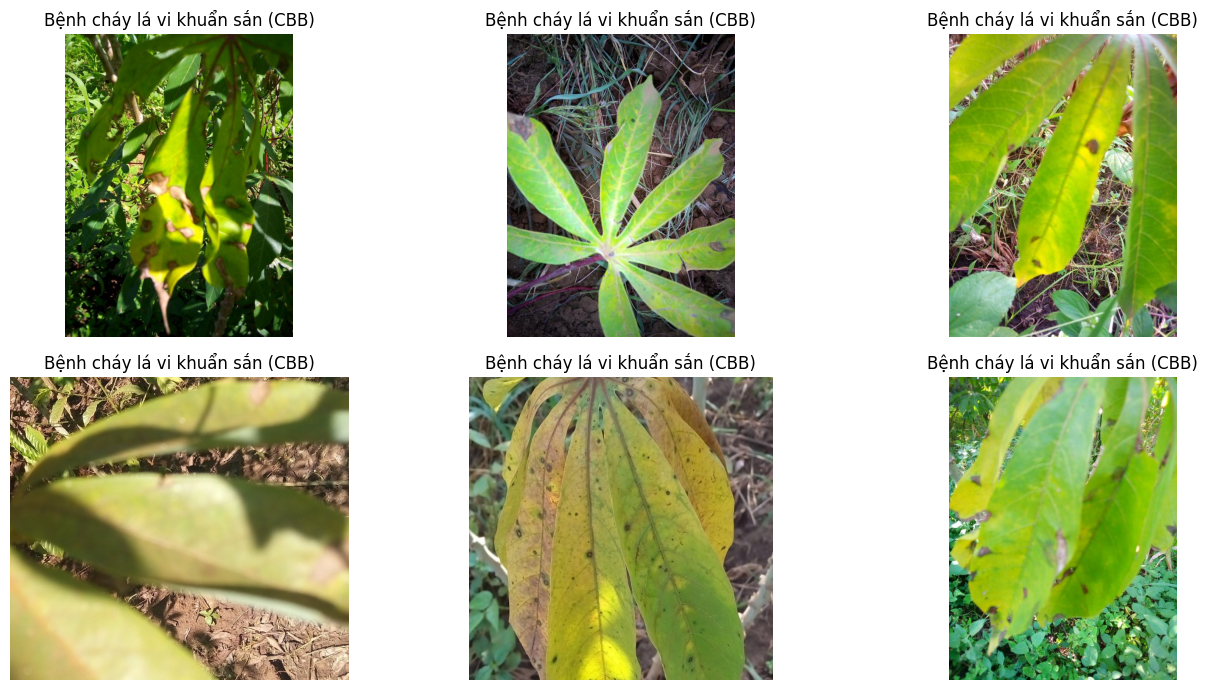

In [ ]:
show_images(data_paths['train'], label="cbb")

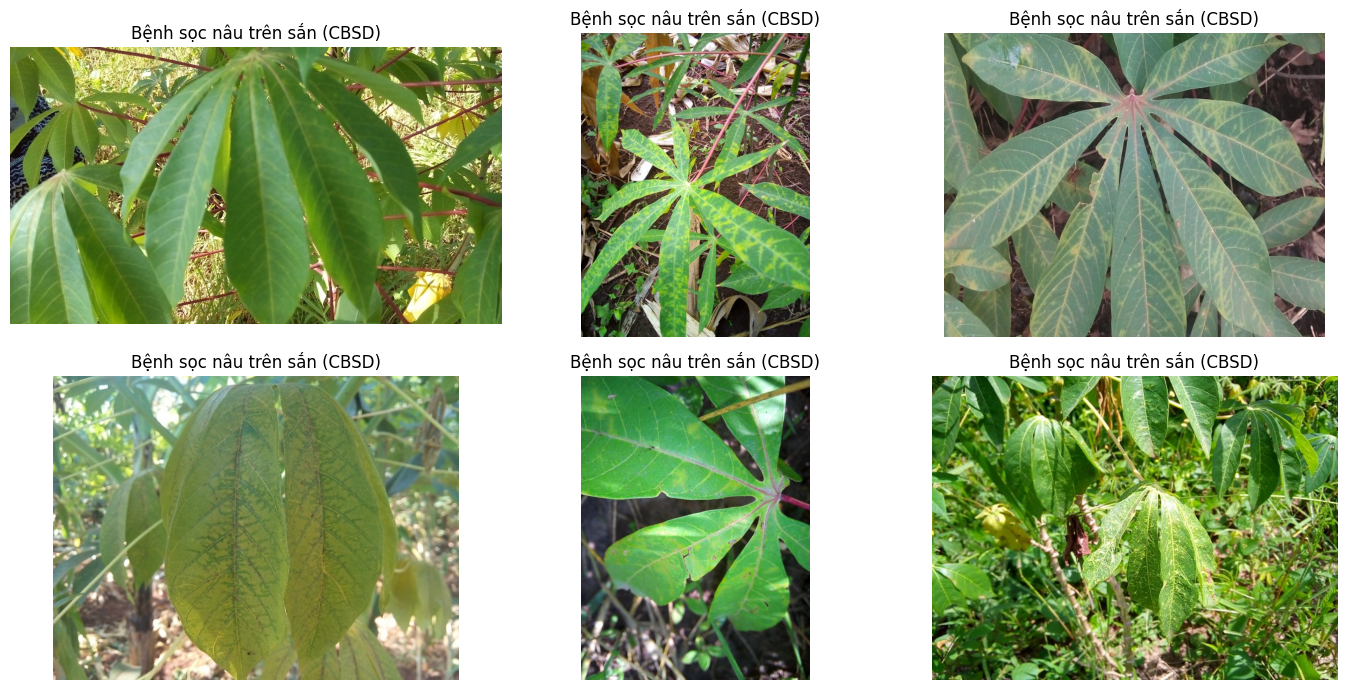

In [ ]:
show_images(data_paths['train'], label="cbsd")

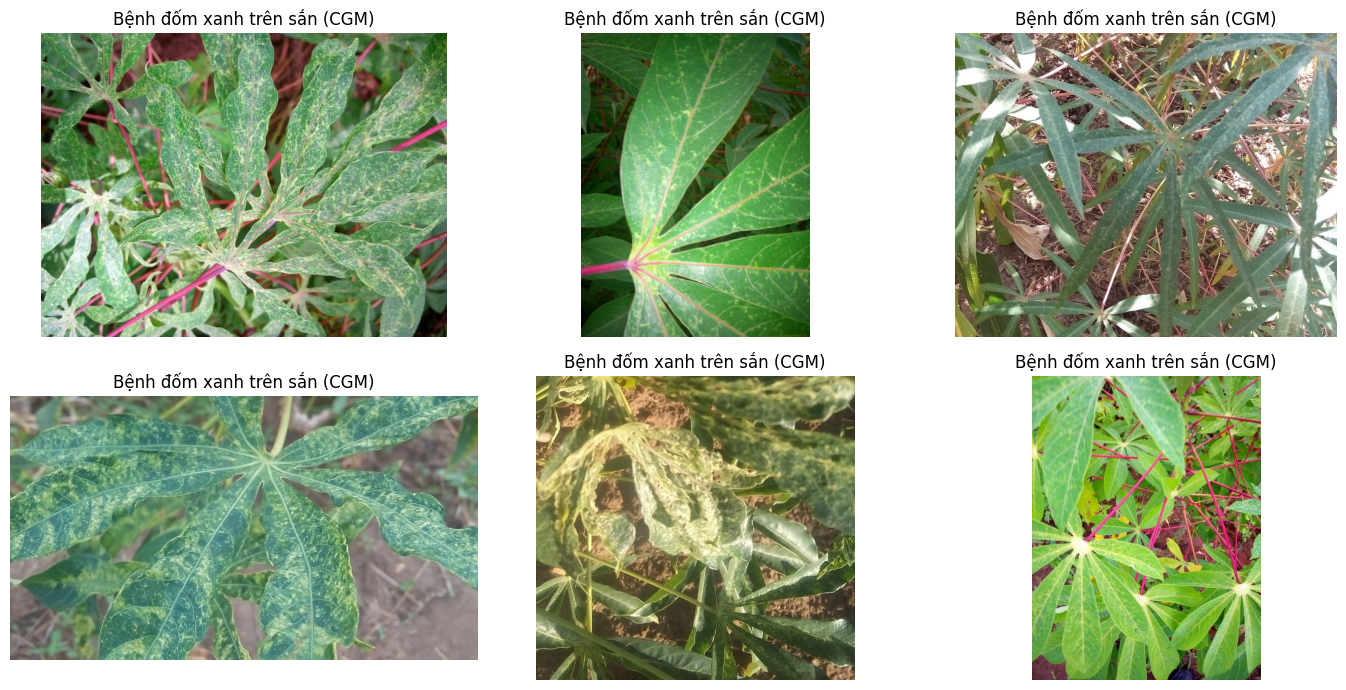

In [ ]:
show_images(data_paths['train'], label="cgm")

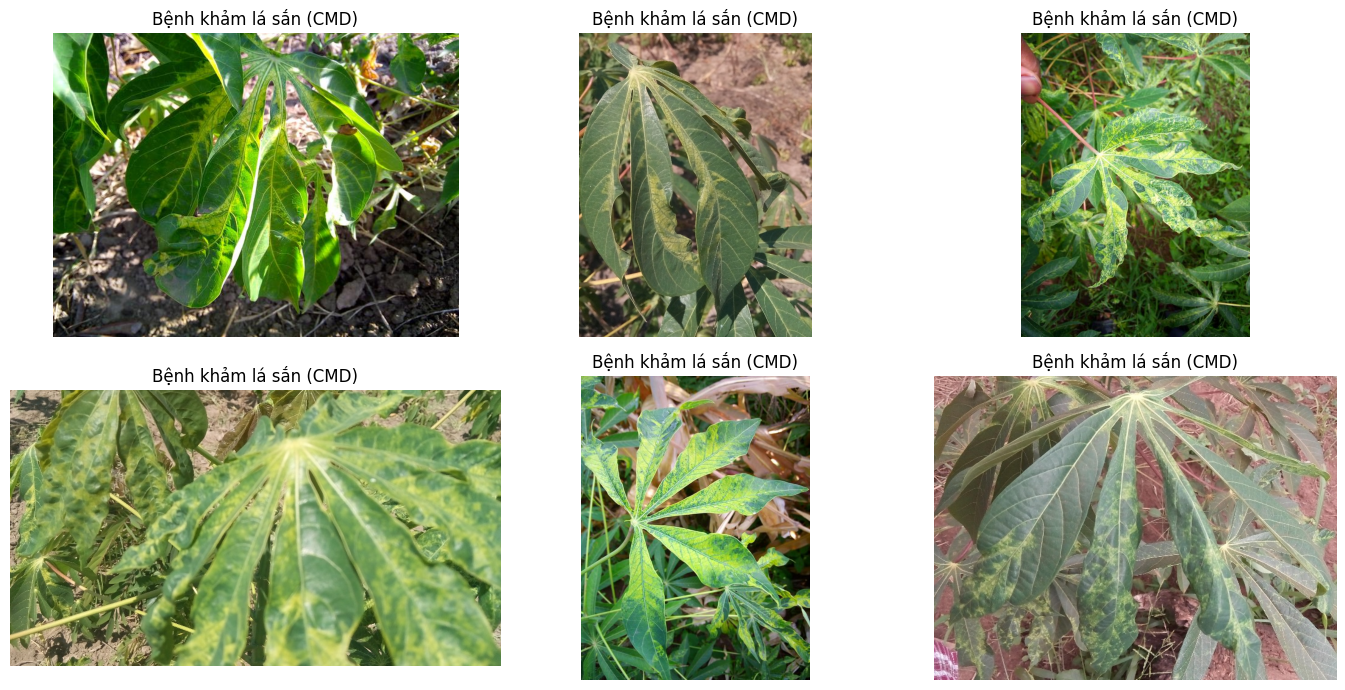

In [ ]:
show_images(data_paths['train'], label="cmd")

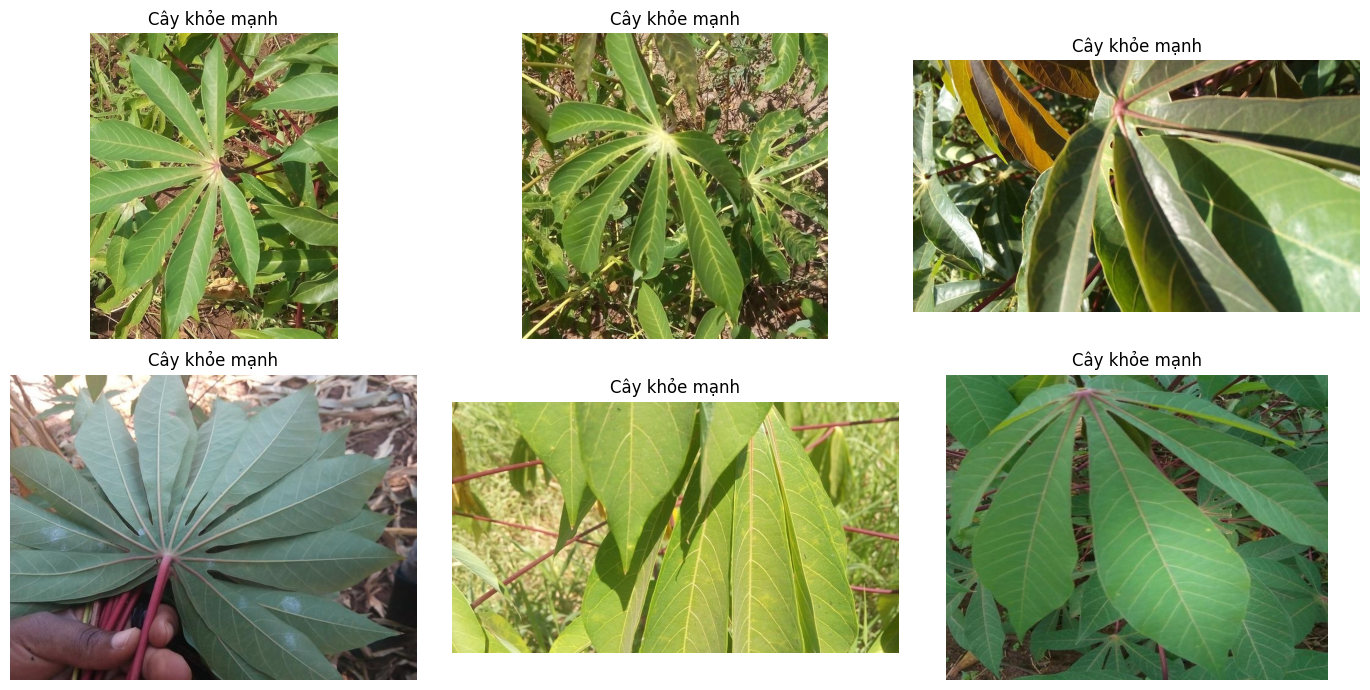

In [ ]:
show_images(data_paths['train'], label="healthy")

In [ ]:
def loader(path):
    return Image.open(path)

#**Data Loader**

In [ ]:
img_size = 224
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
train_data = datasets.ImageFolder(
    root=data_paths['train'],
    loader=loader,
    transform=train_transforms
)
valid_data = datasets.ImageFolder(
    root=data_paths['valid'],
    transform=train_transforms
)
test_data = datasets.ImageFolder(
    root=data_paths['test'],
    transform=train_transforms
)

In [ ]:
BATCH_SIZE = 512

train_dataloader = data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=BATCH_SIZE
)
valid_dataloader = data.DataLoader(
    valid_data,
    batch_size=BATCH_SIZE
)
test_dataloader = data.DataLoader(
    test_data,
    batch_size=BATCH_SIZE
)

len(train_dataloader)

12

Feature batch shape: torch.Size([512, 3, 224, 224])
Labels batch shape: torch.Size([512])


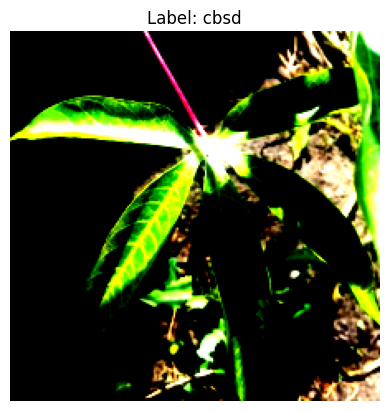

In [ ]:
inputs, labels = next(iter(train_dataloader))
print(f'Feature batch shape: {inputs.size()}')
print(f'Labels batch shape: {labels.size()}')
img = inputs[0].permute(1, 2, 0)
label = labels[0].item()
plt.imshow(img)
plt.axis('off')
plt.title(f'Label: {train_data.classes[label]}')
plt.show()

In [ ]:
train_data.classes

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

#**ResNet Model**

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels, out_channels,
            kernel_size=3, stride=stride, padding=1
        )
        self.batch_norm1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(
            out_channels, out_channels,
            kernel_size=3, stride=1, padding=1
        )
        self.batch_norm2 = nn.BatchNorm2d(out_channels)

        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(
                    in_channels, out_channels,
                    kernel_size=1, stride=stride
                ),
                nn.BatchNorm2d(out_channels)
            )
        self.relu = nn.ReLU()

    def forward(self, x):
        shortcut = x.clone()
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x += self.downsample(shortcut)
        x = self.relu(x)

        return x

In [ ]:
class ResNet(nn.Module):
    def __init__(self, residual_block, n_blocks_lst, n_classes):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.conv2 = self.create_layer(residual_block, 64, 64, n_blocks_lst[0], 1)
        self.conv3 = self.create_layer(residual_block, 64, 128, n_blocks_lst[1], 2)
        self.conv4 = self.create_layer(residual_block, 128, 256, n_blocks_lst[2], 2)
        self.conv5 = self.create_layer(residual_block, 256, 512, n_blocks_lst[3], 2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512, n_classes)

    def create_layer(self, residual_block, in_channels, out_channels, n_blocks, stride):
        blocks = []
        first_block = residual_block(in_channels, out_channels, stride)
        blocks.append(first_block)

        for idx in range(1, n_blocks):
            block = residual_block(out_channels, out_channels, stride=1)
            blocks.append(block)

        block_sequential = nn.Sequential(*blocks)

        return block_sequential


    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.maxpool(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc1(x)

        return x

In [ ]:
n_classes = len(train_data.classes)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = ResNet(
    residual_block=ResidualBlock,
    n_blocks_lst=[2, 2, 2, 2],
    n_classes=n_classes
).to(device)

In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
         MaxPool2d-3           [-1, 64, 56, 56]               0
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,928
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
    ResidualBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,928
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
model.eval()

dummy_tensor = torch.randn(1, 3, 224, 224).to(device)

with torch.no_grad():
    output = model(dummy_tensor)

print('Output shape:', output.shape)

Output shape: torch.Size([1, 5])


**Trainer**

In [ ]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    losses = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss = sum(losses) / len(losses)
    acc = correct / total

    return loss, acc

In [ ]:
def fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    epochs
):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        batch_train_losses = []

        model.train()

        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            batch_train_losses.append(loss.item())

        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        val_loss, val_acc = evaluate(
            model, val_loader,
            criterion, device
        )
        val_losses.append(val_loss)

        print(f'EPOCH {epoch + 1}:\tTrain loss: {train_loss:.4f}\tVal loss: {val_loss:.4f}')

    return train_losses, val_losses

In [ ]:
lr = 1e-2
epochs = 15

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr
)

In [ ]:
train_losses, val_losses = fit(
    model,
    train_dataloader,
    valid_dataloader,
    criterion,
    optimizer,
    device,
    epochs
)

EPOCH 1:	Train loss: 2.3414	Val loss: 18982.4980
EPOCH 2:	Train loss: 1.4260	Val loss: 62.4289
EPOCH 3:	Train loss: 1.3126	Val loss: 2.0607
EPOCH 4:	Train loss: 1.2587	Val loss: 1.4407
EPOCH 5:	Train loss: 1.2138	Val loss: 1.3043
EPOCH 6:	Train loss: 1.2155	Val loss: 1.2178
EPOCH 7:	Train loss: 1.1290	Val loss: 1.3317
EPOCH 8:	Train loss: 1.1179	Val loss: 1.1632
EPOCH 9:	Train loss: 1.1663	Val loss: 1.2241
EPOCH 10:	Train loss: 1.0925	Val loss: 1.1085
EPOCH 11:	Train loss: 1.1295	Val loss: 1.2928
EPOCH 12:	Train loss: 1.0671	Val loss: 1.1132
EPOCH 13:	Train loss: 1.1049	Val loss: 1.1299
EPOCH 14:	Train loss: 1.0339	Val loss: 1.0735
EPOCH 15:	Train loss: 1.0228	Val loss: 1.2364


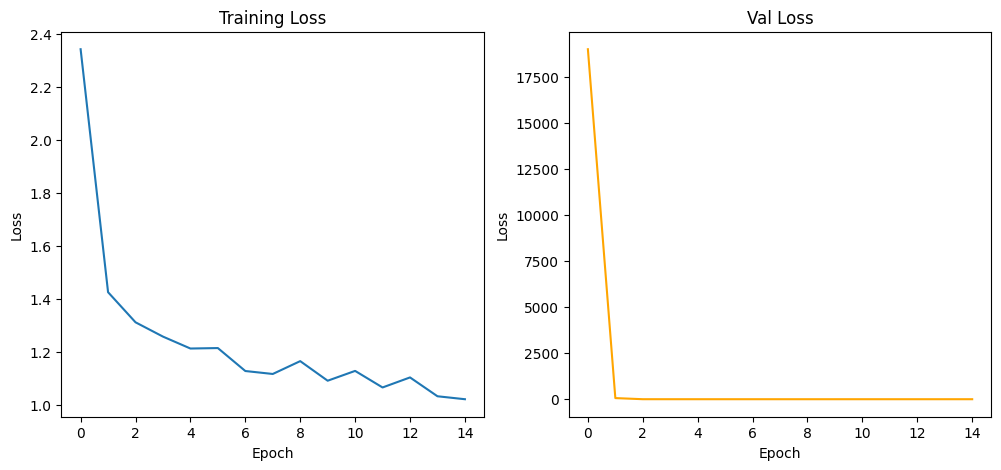

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_losses)
ax[0].set_title('Training Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(val_losses, color='orange')
ax[1].set_title('Val Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
val_loss, val_acc = evaluate(
    model,
    valid_dataloader,
    criterion,
    device
)
test_loss, test_acc = evaluate(
    model,
    test_dataloader,
    criterion,
    device
)

print('Evaluation on val/test dataset')
print('Val accuracy: ', val_acc)
print('Test accuracy: ', test_acc)

Evaluation on val/test dataset
Val accuracy:  0.6130227633668608
Test accuracy:  0.6053050397877984


# **Trainer**

In [ ]:
import time

def train(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=15):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # forward
        predictions = model(inputs)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()

        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [ ]:
train_acc, train_loss = train(model, optimizer, criterion, train_dataloader, device)

In [ ]:
train_acc, train_loss

(0.6366690240452617, 1.0072559068600337)

In [ ]:
def evaluate(model, criterion, valid_dataloader, device):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [ ]:
eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader, device)

In [ ]:
eval_acc, eval_loss

(0.6151402858655374, 1.0776991546154022)

# **Training**

In [ ]:
import torch
import torch.optim as optim
import os
import time

num_classes = len(train_data.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


resnet_model = model
resnet_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = optim.Adam(resnet_model.parameters(), lr=learning_rate)

num_epochs = 10
save_model = './model'

train_accs, train_losses = [], []
eval_accs, eval_losses = [], []
best_loss_eval = 100
os.makedirs(save_model, exist_ok=True)

In [ ]:
for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()

    # Training
    train_acc, train_loss = train(resnet_model, optimizer, criterion, train_dataloader, device, epoch, log_interval=10)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Evaluation
    eval_acc, eval_loss = evaluate(resnet_model, criterion, valid_dataloader, device)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    # Save best model
    if eval_loss < best_loss_eval:
        torch.save(resnet_model.state_dict(), save_model + '/resnet_model.pt')

    # Print loss, acc end epoch
    print("-" * 120)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 120)

    # Load best model
    resnet_model.load_state_dict(torch.load(save_model + '/resnet_model.pt', weights_only=True))
    resnet_model.eval()

| epoch   1 |    10/   12 batches | accuracy    0.645
------------------------------------------------------------------------------------------------------------------------
| End of epoch   1 | Time: 77.78s | Train Accuracy    0.500 | Train Loss    0.992 | Valid Accuracy    0.650 | Valid Loss    0.977 
------------------------------------------------------------------------------------------------------------------------
| epoch   2 |    10/   12 batches | accuracy    0.652
------------------------------------------------------------------------------------------------------------------------
| End of epoch   2 | Time: 75.48s | Train Accuracy    0.667 | Train Loss    0.960 | Valid Accuracy    0.647 | Valid Loss    0.987 
------------------------------------------------------------------------------------------------------------------------
| epoch   3 |    10/   12 batches | accuracy    0.645
--------------------------------------------------------------------------------------------

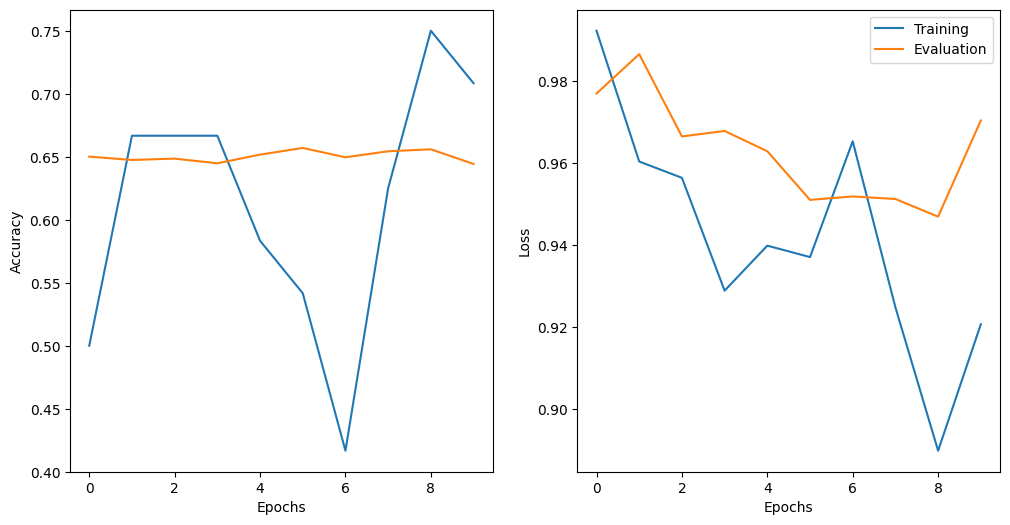

In [ ]:
def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")

    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")

    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses)

In [ ]:
test_acc, test_loss = evaluate(resnet_model, criterion, test_dataloader, device)
test_acc, test_loss

(0.6514588859416446, 0.9382104873657227)

In [ ]:
import torchvision
import torchvision.transforms as transforms

def load_model(model_path, num_classes=5):
    resnet_model = ResNet(residual_block=ResidualBlock, n_blocks_lst=[2, 2, 2, 2], n_classes=num_classes)
    resnet_model.load_state_dict(torch.load(model_path, weights_only=True))
    resnet_model.eval()
    return resnet_model

def inference(img_path, model):
    image = Image.open(img_path)
    img_size = 150

    img_transform = torchvision.transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor(),
    ])
    img_new = img_transform(image)
    img_new = torch.unsqueeze(img_new, 0)
    with torch.no_grad():
        predictions = model(img_new)
    preds = nn.Softmax(dim=1)(predictions)
    p_max, yhat = torch.max(preds.data, 1)
    print(f'Xác suất {round(p_max.item()*100,4)}% cây trồng mắc : ')

    if yhat.item() == 0:
        print("Bệnh cháy lá vi khuẩn sắn (CBB)")
        print("Nguyên gây bệnh: Vi khuẩn sắn")
        print("Biểu hiện: Vàng úa, héo, đốm nâu")
        print("Ảnh hưởng bệnh đến cây trồng: Giảm năng suất, héo rụng lá")
        print("Phương án khắc phục: Trồng giống kháng bệnh, vệ sinh đồng ruộng, phun thuốc chứa đồng")

    elif yhat.item() == 1:
        print("Bệnh sọc nâu trên sắn (CBSD)")
        print("Nguyên gây bệnh: Virus CBSD")
        print("Biểu hiện: Sọc nâu, lá biến dạng")
        print("Ảnh hưởng bệnh đến cây trồng: Thối củ, giảm năng suất nghiêm trọng")
        print("Phương án khắc phục: Dùng giống kháng, kiểm soát rệp sáp, tiêu hủy cây bệnh")

    elif yhat.item() == 2:
        print("Bệnh đốm xanh trên sắn (CGM)")
        print("Nguyên gây bệnh: Virus hoặc điều kiện môi trường")
        print("Biểu hiện: Loang lổ xanh nhạt, xanh đậm")
        print("Ảnh hưởng bệnh đến cây trồng: Ảnh hưởng nhẹ đến trung bình")
        print("Phương án khắc phục: Cải thiện điều kiện chăm sóc, dùng giống kháng, phun thuốc phù hợp.")

    elif yhat.item() == 3:
        print("Bệnh khảm lá sắn (CMD)")
        print("Nguyên gây bệnh: Virus CMD")
        print("Biểu hiện: Loang lổ, lá xoắn, cong")
        print("Ảnh hưởng bệnh đến cây trồng: Giảm năng suất nghiêm trọng, cây còi cọc")
        print("Phương án khắc phục: Trồng giống sạch bệnh, kiểm soát rệp sáp, nhổ bỏ cây nhiễm bệnh.")

    elif yhat.item() == 4:
        print("Cây khỏe mạnh")
        print("Biểu hiện: Xanh tươi, lá bình thường")
        print("Ảnh hưởng bệnh đến cây trồng: Năng suất cao, cây phát triển bình thường")
        print("Phương án khắc phục: Trồng giống sạch bệnh, kiểm soát rệp sáp, nhổ bỏ cây nhiễm bệnh.")

Hình ảnh cây trồng


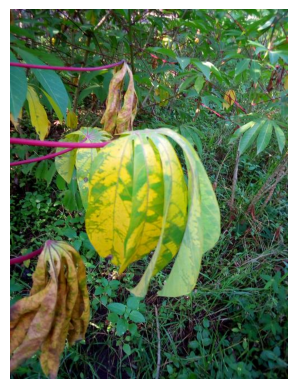


Xác suất 35.3808% cây trồng mắc : 
Bệnh sọc nâu trên sắn (CBSD)
Nguyên gây bệnh: Virus CBSD
Biểu hiện: Sọc nâu, lá biến dạng
Ảnh hưởng bệnh đến cây trồng: Thối củ, giảm năng suất nghiêm trọng
Phương án khắc phục: Dùng giống kháng, kiểm soát rệp sáp, tiêu hủy cây bệnh


In [ ]:
path = '/content/cassavaleafdata/test/cbsd/test-cbsd-114.jpg'
print('Hình ảnh cây trồng')
img = Image.open(path)
plt.imshow(img)
plt.axis('off')
plt.show()
print()
model = load_model('/content/model/resnet_model.pt')
preds = inference(path, model)
preds

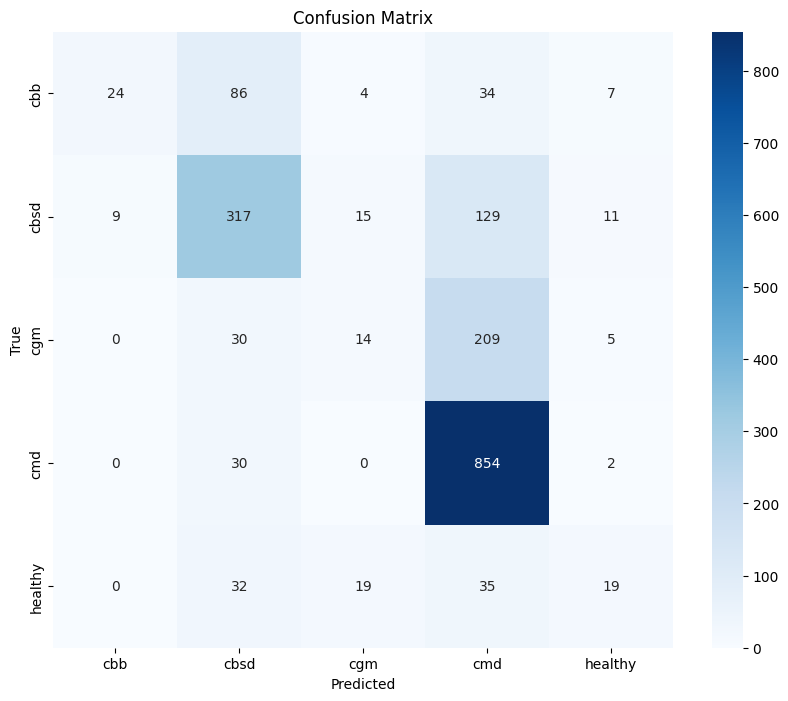

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_and_plot_confusion_matrix(model, dataloader, device, class_labels):

    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs)
            all_predictions.extend(predictions.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return cm

class_labels = ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
cm = evaluate_and_plot_confusion_matrix(resnet_model, test_dataloader, device, class_labels)
